In [1]:
from helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt
import os
from missing_codes import DEFAULT_MISSING, EXCEPTIONS
import numpy as np

In [2]:
data_folder = 'C:/Users/ACER/OneDrive - epfl.ch/Desktop/ML/dataset/'
x_train, x_test, y_train, train_ids, test_ids, train_columns, test_columns = load_csv_data(data_folder, sub_sample=True)

In [3]:
x_train_clean = replace_missing(x_train, DEFAULT_MISSING, EXCEPTIONS)
x_test_clean = replace_missing(x_test, DEFAULT_MISSING, EXCEPTIONS)

In [4]:
print("Number of NaNs in x:", np.isnan(x_test).sum())
print("Number of NaNs in x_test:", np.isnan(x_test_clean).sum())


Number of NaNs in x: 72056
Number of NaNs in x_test: 77241


In [5]:
x_train.shape, x_test.shape, y_train.shape


((500, 321), (500, 321), (500,))

In [6]:
x_train_reduced, x_test_reduced, kept_cols = drop_too_many_missing(x_train_clean, x_test_clean, train_columns,threshold=0.9)


Dropped 96 features (29.9%)
Dropped feature names: ['COLGHOUS', 'LADULT', 'CCLGHOUS', 'NUMPHON2', 'INSULIN', 'BLDSUGAR', 'FEETCHK2', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'EYEEXAM', 'DIABEYE', 'DIABEDU', 'CRGVREL1', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB1', 'CRGVPERS', 'CRGVHOUS', 'CRGVMST2', 'VIDFCLT2', 'VIREDIF3', 'VIPRFVS2', 'VINOCRE2', 'VIEYEXM2', 'VIINSUR2', 'VICTRCT4', 'VIGLUMA2', 'VIMACDG2', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'LONGWTCH', 'ASTHMAGE', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 'ASRCHKUP', 'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 'HAREHAB1', 'STREHAB1', 'CVDASPRN', 'ASPUNSAF', 'RLIVPAIN', 'RDUCHART', 'RDUCSTRK', 'ARTTODAY', 'ARTHWGT', 'ARTHEXER', 'ARTHEDU', 'TETANUS', 'HPVADVC2', 'HPVADSHT', 'SHINGLE2', 'HADMAM', 'HOWLONG', 'HADPAP2', 'LASTPAP2', 'HPVTEST', 'HPLSTTST', 'HADHYST2', 'PROFEXAM', 'LENGEXAM', 'LSTBLDS3', 'PCPSAAD2', 'PCPSADI1', 'PCPSARE1', 'PSATEST1', 'PSATIME', 'PCPSARS1', 'PCPSADE1', 'PCDMDECN', 'SCNTPAID', 'SCNTWRK1', 'SCNTLP

In [ ]:
x_train_imputed, x_test_imputed = mean_imputation(x_train_reduced, x_test_reduced, np.array(train_columns)[kept_cols])


Dropped columns (all NaN): []
New shape after mean imputation: (500, 225)


In [ ]:
x_train_norm, x_test_norm = min_max_normalize(x_train_imputed, x_test_imputed)


c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


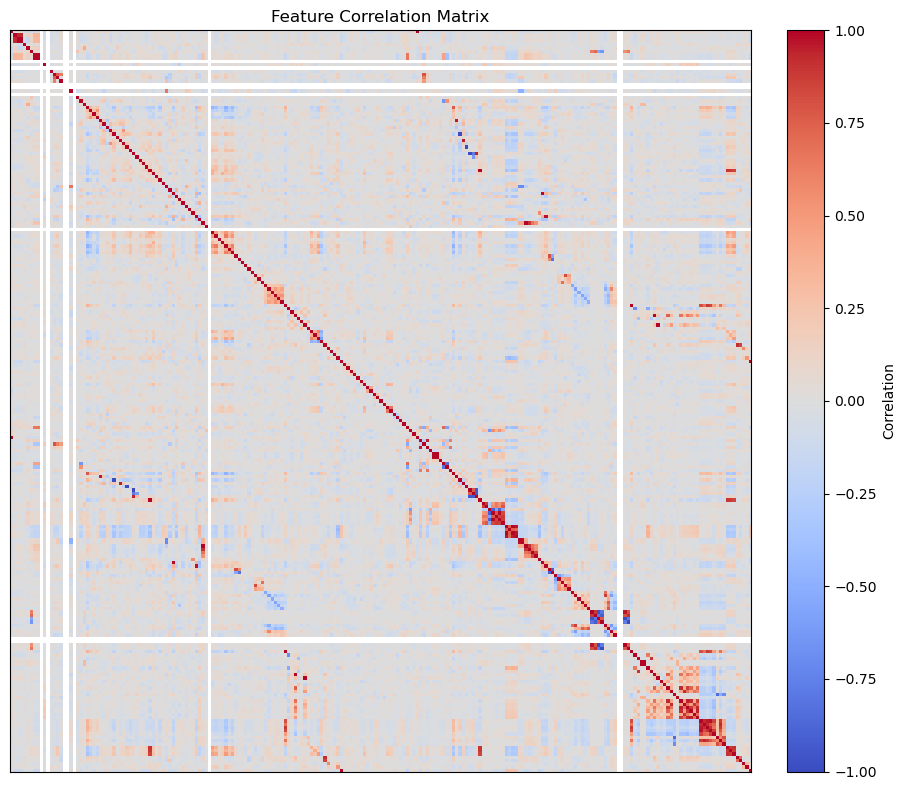


Highly correlated features (|corr| > 0.9):
  _STATE ↔ CRGVPERS : 1.00
  FMONTH ↔ IDATE : 0.93
  FMONTH ↔ IMONTH : 0.93
  IDATE ↔ IMONTH : 1.00
  SEQNO ↔ _PSU : 1.00
  PHYSHLTH ↔ VIMACDG2 : 0.96
  PERSDOC2 ↔ CIMEMLOS : -0.99
  CHECKUP1 ↔ CDHOUSE : 0.95
  BPMEDS ↔ CDASSIST : -1.00
  CHOLCHK ↔ CDHELP : -1.00
  CHOLCHK ↔ CDDISCUS : 0.94
  CHCSCNCR ↔ WTCHSALT : 1.00
  DIABAGE2 ↔ RDUCSTRK : 0.99
  CPDEMO1 ↔ ARTTODAY : 0.98
  EMPLOY1 ↔ STREHAB1 : 1.00
  EMPLOY1 ↔ CVDASPRN : 0.90
  FVBEANS ↔ PSATIME : 1.00
  VEGETAB1 ↔ SCNTWRK1 : 1.00
  EXEROFT1 ↔ SCNTLPAD : 1.00
  LMTJOIN3 ↔ _STRWT : 0.91
  FLUSHOT6 ↔ _CRACE1 : 1.00
  CRGVHOUS ↔ CRGVEXPT : 0.95
  VIREDIF3 ↔ VIPRFVS2 : 1.00
  CDHELP ↔ CDDISCUS : -0.94
  CDSOCIAL ↔ CDDISCUS : -0.93
  ASTHMAGE ↔ ASATTACK : -0.90
  ASATTACK ↔ ASDRVIST : 0.99
  ASACTLIM ↔ ASNOSLEP : 0.99
  ASACTLIM ↔ ASTHMED3 : 0.96
  ASNOSLEP ↔ ASTHMED3 : 0.97
  ASINHALR ↔ HAREHAB1 : 0.98
  STREHAB1 ↔ CVDASPRN : 0.90
  ARTHWGT ↔ ARTHEXER : -0.91
  HADHYST2 ↔ LENGEXAM : -0.96
  H

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix (rows=features)
corr = np.corrcoef(x_train_norm, rowvar=False)

# Plot heatmap
plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04, label="Correlation")
plt.xticks([])
plt.yticks([])
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Optionally print highly correlated pairs
threshold = 0.9
print(f"\nHighly correlated features (|corr| > {threshold}):")
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[1]):
        if abs(corr[i, j]) > threshold:
            print(f"  {train_columns[i]} ↔ {train_columns[j]} : {corr[i, j]:.2f}")


In [10]:
x_train_final, x_test_final, kept_cols, dropped_features = drop_highly_correlated(
    x_train_norm,
    x_test_norm,
    feature_names=train_columns,
    threshold=0.9
)


Dropped 44 highly correlated features:
['IDATE', 'IMONTH', '_PSU', 'CRGVPERS', 'CRGVEXPT', 'VIPRFVS2', 'VIMACDG2', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDDISCUS', 'WTCHSALT', 'ASATTACK', 'ASDRVIST', 'ASNOSLEP', 'ASTHMED3', 'HAREHAB1', 'STREHAB1', 'CVDASPRN', 'RDUCSTRK', 'ARTTODAY', 'ARTHEXER', 'LENGEXAM', 'BLDSTOOL', 'PCPSARE1', 'PSATEST1', 'PSATIME', 'SCNTMNY1', 'SCNTPAID', 'SCNTWRK1', 'SCNTLPAD', 'CASTHNO2', 'EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADSLEEP', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADANXEV', '_STSTR', '_STRWT', '_CRACE1']


In [12]:
x_train_final.shape

(500, 181)

In [13]:
import numpy as np

def clip_outliers(x_train, x_test=None, n_std=3):
    """
    Clips outliers to within mean ± n_std * std for each feature.
    Reports how many values were clipped.

    Args:
        x_train (np.array): shape=(N,D) training feature matrix
        x_test (np.array, optional): shape=(M,D) test feature matrix
        n_std (float): number of standard deviations for clipping

    Returns:
        tuple:
            x_train_clipped (np.array): clipped training data
            x_test_clipped (np.array or None): clipped test data (if provided)
            n_clipped (int): number of values clipped in training set
    """
    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    
    clip_min = mean - n_std * std
    clip_max = mean + n_std * std

    # Count values to be clipped (before applying np.clip)
    below_min = x_train < clip_min
    above_max = x_train > clip_max
    n_clipped = np.sum(below_min | above_max)

    # Apply clipping
    x_train_clipped = np.clip(x_train, clip_min, clip_max)

    print(f"Clipped {n_clipped} values in x_train "
          f"({n_clipped / x_train.size * 100:.2f}% of all entries)")

    if x_test is not None:
        below_min_test = x_test < clip_min
        above_max_test = x_test > clip_max
        n_clipped_test = np.sum(below_min_test | above_max_test)
        x_test_clipped = np.clip(x_test, clip_min, clip_max)
        print(f"Clipped {n_clipped_test} values in x_test "
              f"({n_clipped_test / x_test.size * 100:.2f}%)")
        return x_train_clipped, x_test_clipped, n_clipped, n_clipped_test

    return x_train_clipped, n_clipped


In [15]:
def pca_reduce(x_train, x_test=None, variance_threshold=0.95):
    """
    Perform PCA and reduce dimensionality to preserve given variance.

    Args:
        x_train (np.array): training data, shape (N, D)
        x_test (np.array, optional): test data, shape (M, D)
        variance_threshold (float): fraction of variance to keep (e.g. 0.95)

    Returns:
        x_train_pca (np.array)
        x_test_pca (np.array or None)
        eigvecs (np.array): principal component directions
        explained_variance (np.array): explained variance ratio per component
    """
  

    # Covariance
    cov = np.cov(x_train, rowvar=False)

    # Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Sort by descending eigenvalue
    idx = np.argsort(eigvals)[::-1]
    eigvals, eigvecs = eigvals[idx], eigvecs[:, idx]

    # Compute explained variance
    explained_variance = eigvals / np.sum(eigvals)
    cumulative_variance = np.cumsum(explained_variance)

    # Determine number of components
    k = np.searchsorted(cumulative_variance, variance_threshold) + 1
    print(f"Keeping {k} components explaining {cumulative_variance[k-1]*100:.2f}% variance")

    # Project data
    x_train_pca = np.dot(x_test, eigvecs[:, :k])

    if x_test is not None:
        
        x_test_pca = np.dot(x_test, eigvecs[:, :k])
        return x_train_pca, x_test_pca, eigvecs[:, :k], explained_variance[:k]

    return x_train_pca, eigvecs[:, :k], explained_variance[:k]


In [16]:
x_train_pca, x_test_pca, eigvecs, var_ratio = pca_reduce(
    x_train_norm,
    x_test_norm,
    variance_threshold=0.95
)


Keeping 92 components explaining 95.12% variance


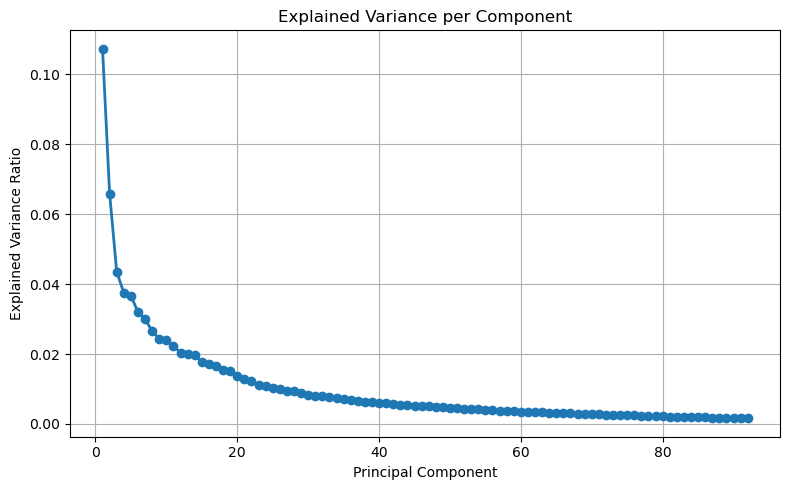

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(var_ratio) + 1), var_ratio, 'o-', linewidth=2)
plt.title("Explained Variance per Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

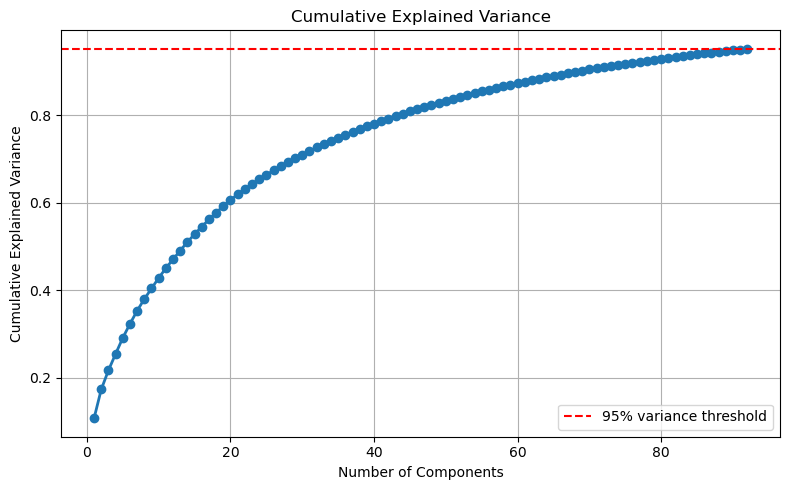

In [20]:
cumulative_variance = np.cumsum(var_ratio)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
y_train_bin = (y_train == 1).astype(int)

In [23]:
max_iters = 1000      # number of gradient descent steps
gamma = 0.01          # learning rate
initial_w = np.zeros(x_train_pca.shape[1])

In [24]:
w, loss = logistic_regression(y_train_bin, x_train_pca, initial_w, max_iters, gamma)
print(f"Final training loss: {loss:.4f}")

Final training loss: 0.2645


In [25]:
def predict_labels(tx, w, threshold=0.5):
    pred = sigmoid(tx @ w)
    return (pred >= threshold).astype(int)

In [28]:
y_pred_train = predict_labels(x_train_pca, w)

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

acc_train = compute_accuracy(y_train_bin, y_pred_train)

print(f"Training accuracy: {acc_train*100:.2f}%")


Training accuracy: 92.20%


In [ ]:
import pandas as pd

# Read CSV
df = pd.read_csv(os.path.join(data_folder, "x_train.csv"))

## Test of the algorithms on a linear regression between 2 features

Weights from GD:  [-9.03146439e+63 -7.18121629e+64]
Weights from SGD:  [nan nan]
Weights from LS:  [798287.38193225 926778.89981154]


c:\Users\ACER\OneDrive - epfl.ch\Desktop\ML\MilaLyon\implementations.py:119: RuntimeWarning: overflow encountered in matmul
  w -= gamma * tx[random_index] * (tx[random_index] @ w - y[random_index])
c:\Users\ACER\OneDrive - epfl.ch\Desktop\ML\MilaLyon\implementations.py:119: RuntimeWarning: invalid value encountered in subtract
  w -= gamma * tx[random_index] * (tx[random_index] @ w - y[random_index])


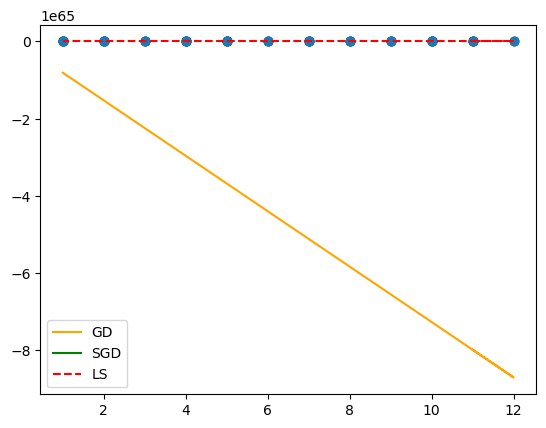

In [ ]:
# We observe that features 1 and 2 are correlated
# Let's test our algorithms on these two features only

import numpy as np
from matplotlib import pyplot as plt
from implementations import mean_squared_error_gd, mean_squared_error_sgd, least_squares

tx = np.ones((x_train.shape[0], 2))
tx[:, 1] = x_train[:, 1]

w_gd, _ = mean_squared_error_gd(x_train[:,2], tx, np.array([0., 0.]), max_iters=100, gamma=0.1)
w_sgd, _ = mean_squared_error_sgd(x_train[:,2], tx, np.array([0., 0.]), max_iters=10000, gamma=0.1)
w_ls, _ = least_squares(x_train[:,2], tx)

print("Weights from GD: ", w_gd)
print("Weights from SGD: ", w_sgd)
print("Weights from LS: ", w_ls)

plt.scatter(x_train[:, 1], x_train[:, 2], alpha=0.2)
plt.plot(x_train[:, 1], tx @ w_gd, label='GD', color='orange')
plt.plot(x_train[:, 1], tx @ w_sgd, label='SGD', color='green')
plt.plot(x_train[:, 1], tx @ w_ls, label='LS', color='red', linestyle='dashed')
plt.legend()

# Preprocessing


Dealing with NaN values, correlated columns, categoric variable.
Handle outliers, encode categorical, feature normalization.


In [ ]:
non_nan_mask = ~np.isnan(x_train).any(axis = 0)
non_nan_indices = np.where(non_nan_mask)[0]

print("Indices of features with no NaN values:", non_nan_indices)
print("Number of features without NaNs out of 321:", non_nan_mask.sum())

Indices of features with no NaN values: [  0   1   2   3   4   5   6   7   8  26  27  28  30  31  32  33  34  36
  39  40  42  43  44  45  46  47  48  50  51  52  53  57  58  59 216 217
 219 220 221 222 227 229 230 231 232 233 235 236 237 239 240 241 242 243
 244 246 247 248 249 255 256 257 258 259 260 261 262 263 264 265 272 273
 274 275 278 279 280 281 282 283 284 287 288 298 305 306 307 308 309 310
 311 312 316 317]
Number of features without NaNs out of 321: 94


### Mean Imputation

In [ ]:
x_train_imp, x_test_imp = mean_imputation(x_train, x_test, train_columns)


Dropped columns (all NaN): ['CCLGHOUS', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 'ASRCHKUP', 'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 'PCPSADE1', 'PCDMDECN']
New shape after mean imputation: (500, 309)


In [ ]:
non_nan_mask = ~np.isnan(x_train_imp).any(axis = 0)
non_nan_indices = np.where(non_nan_mask)[0]

print("Indices of features with no NaN values:", non_nan_indices)
print("Number of features without NaNs out of 321:", non_nan_mask.sum())
print("Number of dropped features", 321- non_nan_mask.sum())

Indices of features with no NaN values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 23

In [ ]:
x_train_norm, x_test_norm = normalize(x_train_imp, x_test_imp)

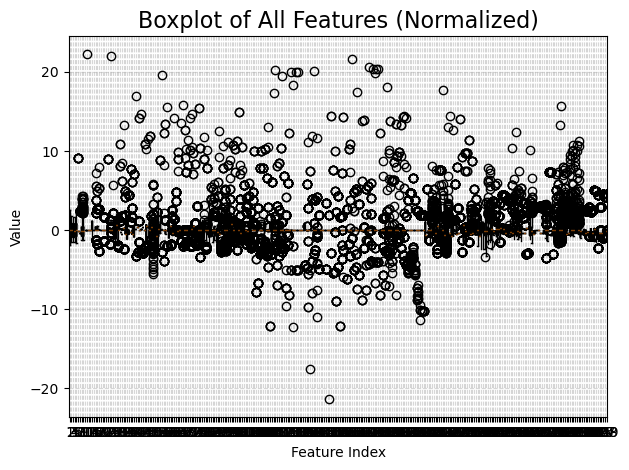

In [ ]:
# Make boxplot with colors
box = plt.boxplot(x_train_norm, patch_artist=True, notch=True, widths=0.6)



# Labels
plt.title("Boxplot of All Features (Normalized)", fontsize=16)
plt.xlabel("Feature Index")
plt.ylabel("Value")

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


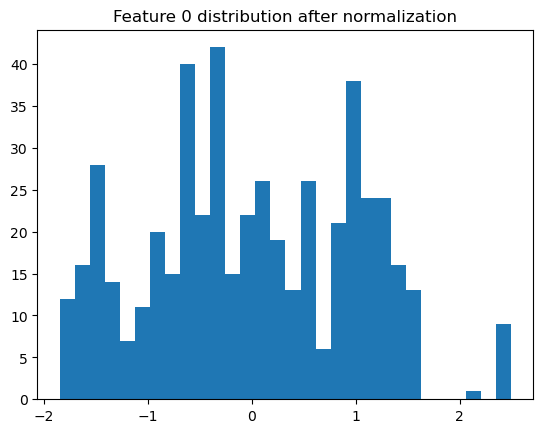

In [ ]:
plt.hist(x_train_norm[:, 0], bins=30)
plt.title("Feature 0 distribution after normalization")
plt.show()


c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0, 0.5, 'Features')

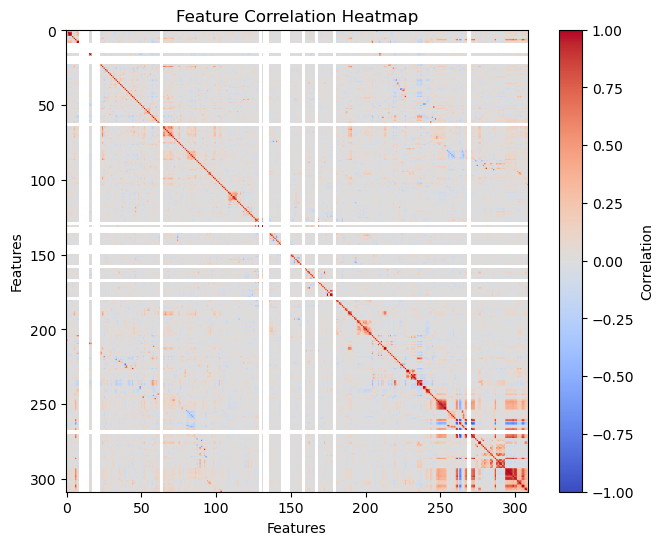

In [ ]:
corr_matrix = np.corrcoef(x_train_norm, rowvar=False)  # shape (D, D)

# Step 2: Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title("Feature Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")



In [ ]:
threshold = 0.9
high_corr_pairs = []

for i in range (corr_matrix.shape[0]):
    for j in range (i+1, corr_matrix.shape[0]):
        if abs(corr_matrix[i,j]) > threshold:
            high_corr_pairs.append((i,j))
            
            print(f"Features {train_columns[i]} and {train_columns[j]} have correlation {corr_matrix[i,j]:.2f}")
    

Features _STATE and ADDOWN have correlation 1.00
Features FMONTH and IDATE have correlation 0.93
Features FMONTH and IMONTH have correlation 0.93
Features IDATE and IMONTH have correlation 1.00
Features SEQNO and _PSU have correlation 1.00
Features CVDSTRK3 and _CHISPNC have correlation -1.00
Features MARITAL and _RACE_G1 have correlation 0.99
Features EXEROFT2 and _FRT16 have correlation 0.91
Features PNEUVAC3 and _PA300R2 have correlation 0.99
Features VIREDIF3 and VINOCRE2 have correlation 0.92
Features VIREDIF3 and VIEYEXM2 have correlation 0.92
Features VINOCRE2 and VIEYEXM2 have correlation 1.00
Features ARTTODAY and HADPAP2 have correlation 0.91
Features HPVTEST and HADHYST2 have correlation 1.00
Features HPVTEST and PROFEXAM have correlation 1.00
Features HADHYST2 and PROFEXAM have correlation 1.00
Features ADSLEEP and ADEAT1 have correlation 0.95
Features ADTHINK and ADMOVE have correlation 1.00
Features _STSTR and _LTASTH1 have correlation 0.95
Features _DUALUSE and _DUALCOR 

In [ ]:
np.sum(np.abs(corr_matrix == 1))

131

In [ ]:
one_corr_pairs = []

for i in range (corr_matrix.shape[0]):
    for j in range (i+1, corr_matrix.shape[0]):
        if abs(corr_matrix[i,j]) > 0.99:
            one_corr_pairs.append((i,j))
            
            print(f"Features {train_columns[i]} and {train_columns[j]} have correlation {corr_matrix[i,j]:.2f}")
    

Features _STATE and ADDOWN have correlation 1.00
Features IDATE and IMONTH have correlation 1.00
Features SEQNO and _PSU have correlation 1.00
Features CVDSTRK3 and _CHISPNC have correlation -1.00
Features PNEUVAC3 and _PA300R2 have correlation 0.99
Features VINOCRE2 and VIEYEXM2 have correlation 1.00
Features HPVTEST and HADHYST2 have correlation 1.00
Features HPVTEST and PROFEXAM have correlation 1.00
Features HADHYST2 and PROFEXAM have correlation 1.00
Features ADTHINK and ADMOVE have correlation 1.00
Features _DUALUSE and _DUALCOR have correlation 1.00
Features WTKG3 and _BMI5 have correlation 0.99
Features DROCDY3_ and ORNGDAY_ have correlation -1.00
Features _RFBING5 and VEGEDA1_ have correlation -1.00
Features _VEGRESP and _FRUTSUM have correlation 1.00
Features PA1VIGM_ and _PACAT1 have correlation 1.00


## Dictionary

I'm arrived till index 145 (ASTHMAGE) which needs to be done.

In [ ]:
train_columns[293]

'PAFREQ1_'

In [ ]:
# Default missing codes for all features
DEFAULT_MISSING = [7, 9]

EXCEPTIONS = {}

for i in range(0, 24):
    EXCEPTIONS[i] = []
    
for i in [216,217,218, 248, 249, 250, 251, 253, 254, 266, 267, 268, 269, 270,271, 276, 277, 285, 286, 291, 292, 295, 296, 299, 300, 301, 302, 303, 304]:
    EXCEPTIONS[i] = []

for i in [252]:
    EXCEPTIONS[i] = [99999] # don't know
    
for i in [262]:
    EXCEPTIONS[i] = [900] # don't know

for i in [264, 287, 288, 293, 294, 297]:
    EXCEPTIONS[i] = [99900] # don't know 

for i in [242]:
    EXCEPTIONS[i] = [9] # don't know
    
for i in [246]:
    EXCEPTIONS[i] = [14] # don't know
    
for i in [247]:
    EXCEPTIONS[i] = [3] # don't know
       
for i in [88]:
    EXCEPTIONS[i] = [98,77, 99] # 98 other, 77 don't know, 99 refused
    
for i in [60, 78, 80, 98, 119, 122, 168, 224, 225,239, 240 ]:
    EXCEPTIONS[i] = [77, 99] # 77 don't know, 99 refused

for i in [27,28,29,79,112, 114, 206, 207, 208, 209, 210, 211, 212, 213]:
    EXCEPTIONS[i] = [77, 88, 99] # 77 don't know, 88 None, 99 refused
    
for i in [33, 58, 99, 115, 118, 132, 151, 152, 153, 154, 192, 193]:
    EXCEPTIONS[i] = [7, 8, 9] # 8 never and not able to work or not applicable
    
for i in [147,148]:
    EXCEPTIONS[i] = [88, 98] # 88 none , 98 don't know
    
for i in [195, 197]:
    EXCEPTIONS[i] = [97, 98, 99] # 97 don't know , 98 zero,  99 refused
        
for i in [49, 145]:
    EXCEPTIONS[i] = [98, 99] # 98 don't know , 99 refused

for i in [59]:
    EXCEPTIONS[i] = [88, 99] # 88 None, 99 refused
    
for i in [62,63]:
    EXCEPTIONS[i] = [7777, 9999] # 7777 don't know, 9999 refused

for i in [75]:
    EXCEPTIONS[i] = [8, 77, 99]  # 8 Never, 77 don't know, 99 refused

for i in [77, 94, 110, 150]:
    EXCEPTIONS[i] = [777, 888, 999] # 777 don't know, 888 no drinks/ never, 999 refused
    
for i in range(81, 87):
    EXCEPTIONS[i] = [555, 777, 999] # 555 Never, 777 don't know, 999 refused

for i in [75, 130]:
    EXCEPTIONS[i] = [8, 77, 99] # 8 Never/ non applicable, 77 don't know, 99 refused
    
for i in [60, 78, 80, 102, 106]:
    EXCEPTIONS[i] = [77, 99] # 77 don't know, 99 refused

for i in [89,90,92, 93]:
    EXCEPTIONS[i] = [777, 999] # 777 don't know, 999 refused

for i in [91, 113]:
    EXCEPTIONS[i] = [88, 98, 77, 99] # 88 No other activity, 98 other/never heard, 77 don't know, 99 refused

for i in [101,105]:
    EXCEPTIONS[i] = [777777, 999999] # 777777 don't know, 999999 refused]   
    
for i in [111, 143]:
    EXCEPTIONS[i] = [555, 777,888, 999] # 555 No feet, 777 don't know, 888 never, 999 refused
    
for i in [127,128]:
    EXCEPTIONS[i] = [7,8] # 7 don't know, 8 not applicable

for i in [129, 137, 138,139, 140]:
    EXCEPTIONS[i] = [5,7,9] # 5 never, 7 don't know, 9 refused 

for i in [131]:
    EXCEPTIONS[i] = [5,7,8,9] # 5 never, 7 don't know, 8 not applicable 9 refused 
    
for i in [148,149]:
    EXCEPTIONS[i] = [88, 98, 99] # 88 none, 98 don't know , 99 refused

In [ ]:
def replace_missing_with_exceptions(x, feature_index, EXCEPTIONS):
    """
    Replace default missing codes and any feature-specific exceptions with NaN
    """
    x = x.astype(float)
    
    # Start with default missing codes
    codes_to_replace = list(DEFAULT_MISSING)
    
    # Add feature-specific codes if present
    if feature_index in EXCEPTIONS:
        codes_to_replace.extend(EXCEPTIONS[feature_index])
    
    # Replace with NaN
    for code in codes_to_replace:
        x[x == code] = np.nan
        
    return x


In [ ]:
def preprocess_dataset(X, EXCEPTIONS):
    """
    Clean the full dataset using DEFAULT_MISSING and feature-specific EXCEPTIONS
    """
    n_features = X.shape[1]
    X_clean = np.empty_like(X, dtype=float)
    
    for j in range(n_features):
        X_clean[:, j] = replace_missing_with_exceptions(X[:, j], j, EXCEPTIONS)
    
    return X_clean


## Cleaning Test

IDATE can be discarded (we have IDAY, IMONTH, IYEAR).
LADULT	NUMADULT	NUMMEN	NUMWOMEN are continuos (9 has a value but don't display a lot)

In [ ]:

SPECIAL_CODES = [7, 9, 77, 99, 777, 999]

In [ ]:
def detect_feature_type(x, cat_threshold=11):
    """
    Automatically detect feature type.
    - x: 1D numpy array (feature column)
    - cat_threshold: maximum number of unique valid values to consider categorical
    Returns: 'categorical' or 'continuous'
    """
    x = x.astype(float)
    # Step 1: separate special codes and valid values
    valid_mask = ~np.isin(x, SPECIAL_CODES) & ~np.isnan(x)
    valid_vals = x[valid_mask]
    
    # Step 2: decide based on number of unique valid values
    if len(np.unique(valid_vals)) <= cat_threshold:
        return "categorical"
    else:
        return "continuous"


In [ ]:
def replace_special_codes_with_nan(x):
    """
    Replace all SPECIAL_CODES in x with np.nan
    """
    x = x.astype(float)  # ensure float so we can assign NaN
    for code in SPECIAL_CODES:
        x[x == code] = np.nan
    return x

In [ ]:
def build_feature_dictionary(X, cat_threshold=20):
    """
    Build a dictionary describing each feature:
    - type: categorical or continuous
    - invalid: list of special codes present in the feature
    - X_clean: data with special codes replaced by NaN
    """
    n_features = X.shape[1]
    feature_info = {}
    X_clean = np.empty_like(X, dtype=float)
    
    for j in range(n_features):
        col = X[:, j]
        # Step 1: replace special codes with NaN
        col_clean = replace_special_codes_with_nan(col)
        X_clean[:, j] = col_clean
        
        # Step 2: detect feature type safely
        ftype = detect_feature_type(col_clean, cat_threshold)
        
        # Step 3: detect which special codes were present
        present_codes = [code for code in SPECIAL_CODES if code in col]
        
        # Step 4: store info
        feature_info[j] = {
            "type": ftype,
            "invalid": present_codes
        }
    
    return feature_info, X_clean


In [ ]:

feature_info, X_clean = build_feature_dictionary(df.values)

print("Feature types & invalid codes:")
for k, v in feature_info.items():
    print(k, v)

print("\nCleaned dataset:")
print(X_clean)

Feature types & invalid codes:
0 {'type': 'continuous', 'invalid': [7, 9, 77, 99, 777, 999]}
1 {'type': 'continuous', 'invalid': [9]}
2 {'type': 'categorical', 'invalid': [7, 9]}
3 {'type': 'continuous', 'invalid': []}
4 {'type': 'categorical', 'invalid': [7, 9]}
5 {'type': 'continuous', 'invalid': [7, 9]}
6 {'type': 'categorical', 'invalid': []}
7 {'type': 'categorical', 'invalid': []}
8 {'type': 'continuous', 'invalid': []}
9 {'type': 'continuous', 'invalid': []}
10 {'type': 'categorical', 'invalid': []}
11 {'type': 'categorical', 'invalid': []}
12 {'type': 'categorical', 'invalid': []}
13 {'type': 'categorical', 'invalid': []}
14 {'type': 'categorical', 'invalid': []}
15 {'type': 'categorical', 'invalid': []}
16 {'type': 'categorical', 'invalid': [7, 9]}
17 {'type': 'categorical', 'invalid': [7, 9]}
18 {'type': 'categorical', 'invalid': [7, 9]}
19 {'type': 'categorical', 'invalid': []}
20 {'type': 'categorical', 'invalid': []}
21 {'type': 'categorical', 'invalid': []}
22 {'type': 'c

7,77 don't know \
9,99 refused \
PHYSHLTH, POORHLTH ecc 8, 88 is None (to deal with) \
DIABAGE2 98 is none... \
EMPLOY1 8 is not don't know but is unable to work


In [ ]:
feature_rules = {}

for col in range(x_train.shape[1]):
    col_type = detect_feature_type(x_train[:, col])
    
    if col_type == "continuous":
        feature_rules[col] = {"type": "continuous", "invalid": []}
    else:
        feature_rules[col] = {"type": "categorical", "invalid": [7, 9, 77, 99]}

In [ ]:
train_columns[145]


'ASTHMAGE'

### Altro tentativo


In [ ]:

# Default missing codes for all features
DEFAULT_MISSING = [7, 9]

EXCEPTIONS = {}

for i in range(0, 24):
    EXCEPTIONS[i] = []

for i in [88]:
    EXCEPTIONS[i] = [98,77, 99] # 98 other, 77 don't know, 99 refused
    
for i in [60, 78, 80, 98, 119, 122]:
    EXCEPTIONS[i] = [77, 99] # 77 don't know, 99 refused

for i in [27,28,29,79,112, 114]:
    EXCEPTIONS[i] = [77, 88, 99] # 77 don't know, 88 None, 99 refused
    
for i in [33, 58, 99, 115, 118, 132]:
    EXCEPTIONS[i] = [7, 8, 9] # 8 never and not able to work
    
for i in range(49, 50):
    EXCEPTIONS[i] = [98, 99] # 98 don't know , 99 refused

for i in [59]:
    EXCEPTIONS[i] = [88, 99] # 88 None, 99 refused
    
for i in [62,63]:
    EXCEPTIONS[i] = [7777, 9999] # 7777 don't know, 9999 refused

for i in [75]:
    EXCEPTIONS[i] = [8, 77, 99]  # 8 Never, 77 don't know, 99 refused

for i in [77, 94, 110]:
    EXCEPTIONS[i] = [777, 888, 999] # 777 don't know, 888 no drinks/ never, 999 refused
    
for i in range(81, 87):
    EXCEPTIONS[i] = [555, 777, 999] # 555 Never, 777 don't know, 999 refused

for i in [75, 130]:
    EXCEPTIONS[i] = [8, 77, 99] # 8 Never/ non applicable, 77 don't know, 99 refused
    
for i in [60, 78, 80, 102, 106]:
    EXCEPTIONS[i] = [77, 99] # 77 don't know, 99 refused

for i in [89,90,92, 93]:
    EXCEPTIONS[i] = [777, 999] # 777 don't know, 999 refused

for i in [91, 113]:
    EXCEPTIONS[i] = [88, 98, 77, 99] # 88 No other activity, 98 other/never heard, 77 don't know, 99 refused

for i in [101,105]:
    EXCEPTIONS[i] = [777777, 999999] # 777777 don't know, 999999 refused]   
    
for i in [111, 143]:
    EXCEPTIONS[i] = [555, 777,888, 999] # 555 No feet, 777 don't know, 888 never, 999 refused
    
for i in [127,128]:
    EXCEPTIONS[i] = [7,8] # 7 don't know, 8 not applicable

for i in [129, 137, 138,139, 140]:
    EXCEPTIONS[i] = [5,7,9] # 5 never, 7 don't know, 9 refused 

for i in [131]:
    EXCEPTIONS[i] = [5,7,8,9] # 5 never, 7 don't know, 8 not applicable 9 refused 


In [ ]:
def replace_missing_with_nan(x, feature_index):
    """
    Replace default missing codes and any feature-specific exceptions with NaN
    """
    x = x.astype(float)
    
    # Start with default missing codes
    codes_to_replace = list(DEFAULT_MISSING)
    
    # Add feature-specific codes if present
    if feature_index in EXCEPTIONS:
        codes_to_replace.extend(EXCEPTIONS[feature_index])
    
    # Replace with NaN
    for code in codes_to_replace:
        x[x == code] = np.nan
        
    return x


In [ ]:
def preprocess_with_exceptions(X):
    n_features = X.shape[1]
    X_clean = np.empty_like(X, dtype=float)
    
    for j in range(n_features):
        X_clean[:, j] = replace_missing_with_nan(X[:, j], j)
    
    return X_clean
